In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

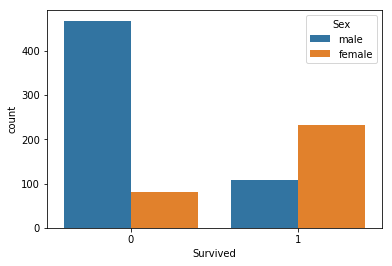

In [6]:
 sns.countplot(x = 'Survived', data = df, hue = 'Sex')

In [7]:
df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
df['Cabin'].isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [10]:
df['Age'].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [11]:
df['Survived'].isna().value_counts()

False    891
Name: Survived, dtype: int64

In [12]:
df['Pclass'].isna().value_counts()

False    891
Name: Pclass, dtype: int64

In [13]:
df['SibSp'].isna().value_counts()

False    891
Name: SibSp, dtype: int64

In [14]:
df['Parch'].isna().value_counts()

False    891
Name: Parch, dtype: int64

In [15]:
df['Fare'].isna().value_counts()

False    891
Name: Fare, dtype: int64

In [16]:
df['Embarked'].isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

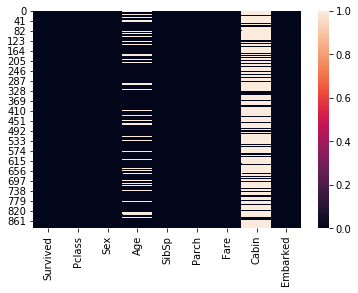

In [17]:
sns.heatmap(df.isna())

In [18]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df['Age'].mean()

29.69911764705882

In [21]:
df['Age'] = np.where(df['Age'].isna(),df['Age'].mean(),df['Age'])

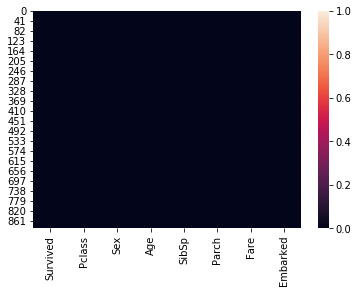

In [22]:
sns.heatmap(df.isna())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


C:\Users\piyush.jha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


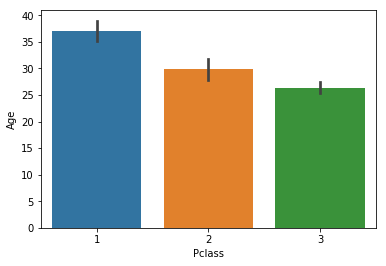

In [24]:
sns.barplot(x = 'Pclass',y = 'Age', data = df)

In [25]:
mean_1  = df[df['Pclass']==1]['Age'].mean()
mean_2  = df[df['Pclass']==2]['Age'].mean()
mean_3  = df[df['Pclass']==3]['Age'].mean()

In [26]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [27]:
type(df.groupby('Pclass')['Age'].mean())

pandas.core.series.Series

In [28]:
print(f'Class 1: {mean_1}, Class 2 : {mean_2}, Class 3: {mean_3}')

Class 1: 37.04811819172115, Class 2 : 29.8669581202046, Class 3: 26.403258655804464


In [29]:
def func(row):
    if row['Pclass'] == 1 and row['Age'].isna():
        row['Age'] = 38
        return row
    elif row['Pclass'] == 2 and row['Age'].isna():
        row['Age'] = 29
        return row
    elif row['Pclass'] == 3 and row['Age'].isna():
        row['Age'] = 25
        return row
    else:
        row['Age'] = row['Age']
        return row

In [30]:
def impute_age(cols):
    age = cols[1]
    pclass = cols[0]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

In [31]:
df['Age'] = df[['Pclass','Age']].apply(impute_age, axis = 1)

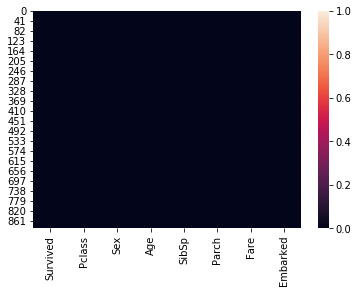

In [32]:
sns.heatmap(df.isnull())

In [33]:
df.dropna(inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [37]:
df.drop(['Sex','Embarked'], axis = 1, inplace = True)

In [38]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [39]:
dataset = pd.concat([df, sex, embarked], axis = 1)

In [40]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
dataset.rename(columns={'male':'Sex'}, inplace=True)

In [42]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


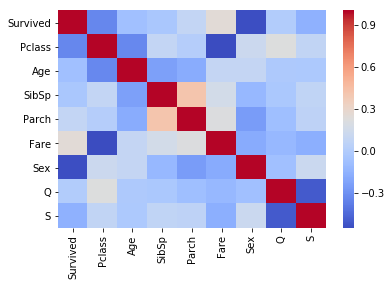

In [43]:
sns.heatmap(dataset.corr(), cmap='coolwarm')

In [44]:
dataset.drop('Fare', axis = 1, inplace = True)

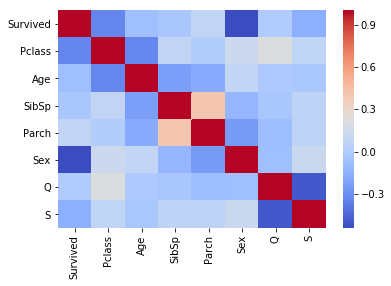

In [45]:
sns.heatmap(dataset.corr(), cmap='coolwarm')

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Sex         889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 44.3 KB


In [47]:
X = dataset.drop('Survived', axis = 1)

In [48]:
y = dataset['Survived']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 563 to 874
Data columns (total 7 columns):
Pclass    622 non-null int64
Age       622 non-null float64
SibSp     622 non-null int64
Parch     622 non-null int64
Sex       622 non-null uint8
Q         622 non-null uint8
S         622 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 26.1 KB


In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 189 to 237
Data columns (total 7 columns):
Pclass    267 non-null int64
Age       267 non-null float64
SibSp     267 non-null int64
Parch     267 non-null int64
Sex       267 non-null uint8
Q         267 non-null uint8
S         267 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 11.2 KB


In [53]:
len(y_train)

622

In [55]:
len(y_test)

267

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
ypred = lr.predict(X_test)

In [60]:
ypred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1], dtype=int64)

In [61]:
y_test

189    0
454    0
667    0
14     0
8      1
691    1
809    1
32     1
269    1
73     0
499    0
692    1
221    0
723    0
589    0
876    0
558    1
609    1
671    0
293    0
254    0
514    0
124    0
421    0
34     0
125    1
660    1
818    0
631    0
400    1
      ..
620    0
166    1
91     0
392    0
767    0
679    1
470    0
460    1
213    0
480    0
260    0
438    0
476    0
687    0
666    0
643    1
300    1
627    1
26     0
568    0
584    0
695    0
398    0
352    0
720    1
382    0
230    1
226    1
745    0
237    1
Name: Survived, Length: 267, dtype: int64

[]

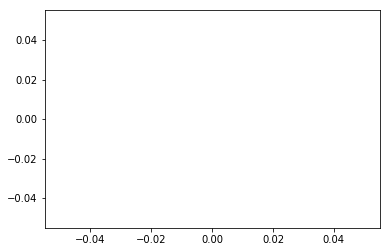

In [65]:
plt.plot(x = y_test, y = ypred)

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test, ypred)

array([[136,  24],
       [ 36,  71]], dtype=int64)